### (15) Please answer true or false explaining why your choice.

a. $n^2 + n + 3^n$ is $O(n^2)$

> False. 

> $3^n$ grows faster than $n^2$

b. $log_2(n)$ is $O(log_{10}(n))$

> True. 

> $log_2(n) = \frac{log_{10}(n)}{log_{10}(2)}$

c. An algorithm with complexity $O(2^n)$ is worse than an algorithm with complexity $O(n^{10})$

> True. 

> Applying log to both sides, need to prove that: $n > 10 log_2(n)$ or

> $0.1 > \frac{log_2(n)}{n}$

> $n \geq 60$

d. Linear search performs better in a sorted array than in a non-sorted array

> False

> Search doesn't depend on whether the array is sorted or not.

e. If there exists an algorithm with $O(1)$ runtime and $O(n)$ memory to solve a problem we are working on, we should always use it becuase it is very fast.

> False

> Although runtime is very good, $O(n)$ implies that the memory is going to grow. Which can cause the computer to run out of memory (memory leak).

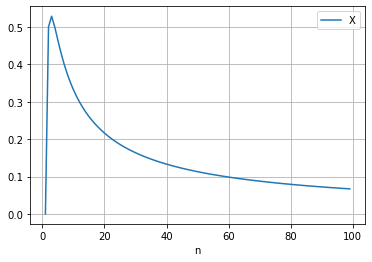

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n = np.arange(1,100)
X = np.log2(n) / n

df = pd.DataFrame(zip(n,X))
df.columns = ['n', 'X']
df.plot(x='n', y='X')
plt.grid()

In [24]:
59**10

511116753300641401

In [25]:
2**59

576460752303423488

### (7) Assume you write a function in Python to perform a given task. 

- Describe how you would apply the scientific to analyze the performance of your code. 
- What kind of additional code do you need to write to accomplish your tasks?
- What kind of mathematical analysis do you need to perform?


The scientific method consists of the following stages:

- Observe
- Hypothesize
- Predict
- Verify
- Validate

We observe the performance of the code. We need to write code that will help us measure the runtime of the code. Additionally, we need to run the code several times for different inputs. 

Based on those inputs, we analize the relationship between the inputs and the observed runtime. Based on that we can make hypothesis about what function describes this relationship.

We now can predict the runtime for different inputs, based on the function before. 

We validate these predictions by running and measuring the runtime again. If the prediction and the prediction are close enough, we have validated our analysis.

At the end, the scietific method provides a practical way to analyze the performance of our code. We can do the same to understand memory as well. In this case, we need to use operating system tools to know how much memory is being consumed by our code. 

### (18) For the following pieces of code, estimate the complexity in terms of the asymptotic notation $O$:

**Part a:**

```
sum = 0
n = N
while n > 0:
    for i in range(n):
        sum = sum + 1
    n = n // 2

# Python uses // for integer division, for example: 1//3 = 0
```

$O(nlog(n))$

**Part b:**

```
sum = 0
for i in range(N):
    for j in range(N):
        sum = sum + 1
```
$O(n^2)$

**Part c:**

```
sum = 0
n = 1
while n < N:
    for i in range(N):
        sum = sum + 1
    n = n * 2
```

$O(nlog(n))$

### Given an array of integers X, return an array Y such that each element represents the number of digits of the corresponding element of X.

For example:

```
X = [1, 234, 34]

Y = [1, 3, 2]
```

In this case `X[0] = 1` which has only one digit, therefore `Y[1] = 1`. In the case of `X[2] = 34`, it has two digits, thus `Y[2] = 2`.

1. Implement a function `count_digits(n)` that returns the number of digits of an integer `n`
2. Implement a function `get_array_digit_count(X)` that returns `Y` and takes array `X` as an input.
3. Calculate the complexity of both `count_digits(n)` and `get_array_digit_count(X)`




In [1]:
def count_digits(n):
    total = 0
    while n > 0:
        n = n // 10
        total += 1
    return total

# str(n);  O(M) where M is the number of digits

def get_array_digit_count(X):
    
    return [count_digits(n) for n in X]

# count_digits takes O(M), where M is the max number of digits
# get_array_digit_count is O(NM), where N is the total number of numbers

get_array_digit_count([1, 23, 4331, 593])

[1, 2, 4, 3]

### We are going to use array M to store the values of a plot in an x-y axis. The indeces of M will represent the values in the x-axis while the values stored in the array represent the values in the y-axis.   

For example:

```
M = [2,3,4,5,2,0]
```

can be plotted as:

<img src="../images/mountain.png" alt="drawing" style="width:400px;"/>







1. Given `M`, write a function that returns `True` if and only if `M` is a valid mountain array. Otherwise, it returns False. 


> `M` is a **mountain array** if and only if:

> $M[0] < M[1] < M[2] < ... < M[i]$

> $M[i] > M[i+1] > ... > M[L]$

> where $0 < i < L$ and $L$ is the length of the array.

**Note:**

- From our example above, $M = [2,3,4,5,2,0]$ is a mountain array (the value of $i$ is 3). So your function returns True. 

- However, $M = [2,3,4,4,2,0]$ is not a mountain array because $M[2] = M[3]$. So your function returns False. 


2. Calculate the complexity of your function. 

In [4]:
def is_mountain(M):

    N = len(M)
    i = 0

    # up direction
    while i+1 < N and M[i] < M[i+1]:
        i += 1

    # no peak at the beginning or end
    if i == 0 or i == N-1:
        return False

    # down direction
    while i+1 < N and M[i] > M[i+1]:
        i += 1

    return i == N-1
    
print(is_mountain([2,3,4,4,2,0]))
print(is_mountain([2,3,4,5,2,0]))

# complexity is O(N), we visit each element of the array only once

False
True


### The median is the middle number in a sorted, ascending or descending array of numbers.

- For a sorted array $A$ of size $N$, the median is $A[\frac{N-1}{2}]$ if $N$ is odd.
- If $N$ is even, the median is $\frac{A[\frac{N}{2}-1] + A[{\frac{N}{2}}]}{2}$

Implement a Python function that return the median of an array. The input of this function is a non-sorted array. 

- Write your own code to sort the array
- Write the function that calculates the median
- Calculate the total complexity of your code.

Note: DO NOT use Python function like `sorted` to sort your array. Write your own implementation with the algorithms we studied in class.

In [5]:
# Use insertion_sort implementation from class

def get_median(A):
    
    A_sorted = insertion_sort(A)
    if len(A) % 2:
        return A_sorted[(len(A_sorted)-1)/2]
    else:
        return (A_sorted[(len(A_sorted)-1)/2] + A_sorted[(len(A_sorted))/2]) / 2
    
# complexity O(n^2) from insertion sort. In the get median, the operation is always constant
        